<a href="https://colab.research.google.com/github/agrawalkunal2/customer_segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [74]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math

from datetime import datetime
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [75]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Capstone_4/Copy of Online Retail.xlsx")

In [76]:
# taking look and feel of the data provided
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [77]:
# data available at the lower end
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [78]:
# shape of data
data.shape

(541909, 8)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [80]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


## Data Preprocessing

**1. Null Value Treatment**

In [81]:
# Identify the number of NAs in each feature and selecting only those having NAs
total_NA = data.isnull().sum()[data.isnull().sum() != 0]

# Calculate the percentage of NA in each feature
percent_NA = data.isnull().sum()[data.isnull().sum() != 0]/data.shape[0]

# Summarize our findings in a dataframe
missing = pd.concat([total_NA, percent_NA], axis=1, keys=['Total NAs', 'Percentage']).sort_values('Total NAs', ascending=False)
missing

,Total NAs,Percentage
CustomerID,135080,0.249267
Description,1454,0.002683


Here, we can observe that we have null entries in two columns namely, CustomerID and Description. <BR>
One important point over here is that we need to do customer segmentation, however, unavailablity of customer id will prove to be no use to us. Hence, we need to drop such columns.

In [82]:
# Drop transactions with missing Customer ID
data.dropna(axis=0, subset=['CustomerID'], inplace= True)

Now we have removed rown with NA entries for Customer ID. <BR>
Let us look at Descriptions with null entries.

In [83]:
data[pd.isnull(data["Description"])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


It seems entries with null values for description column has also been removed. 

**2. Removing Cancelled Entries**<br>
As mentioned in the problem statement few invoice numbers starting from 'C' are cancelled ones, we will remove these from our datasets

In [84]:
# converting into string type
data["InvoiceNo"] = data['InvoiceNo'].astype(str)

In [85]:
# checking the number of cancelled invoices
count = data['InvoiceNo'].str.contains('C').sum()
print("Total Number of cancelled Entries are:",count)

Total Number of cancelled Entries are: 8905


Here, we can observe that there are 8,905 entries which are cancelled. Hence we will be removinng these entries from our dataset

In [86]:
# Data shape before removing cancelled invoice entries
data.shape

(406829, 8)

In [87]:
# Removing cancelled invoice entries
data = data[~data['InvoiceNo'].str.contains('C')]

In [88]:
# Data shape after removing cancelled invoice entries
data.shape

(397924, 8)

In [89]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**3. Removing Duplicate Values** <BR>

In [90]:
print('Number of duplicated records: ', data.duplicated(keep='first').sum())

Number of duplicated records:  5192


In [91]:
#Removing Duplicate Values
indx = data[data.duplicated(keep='first')].index
data.drop(index = indx, inplace= True)

In [92]:
# data shape
data.shape

(392732, 8)

In [93]:
# checking if there is any negative values in quantity
data[data['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [94]:
# checking if there is any negative values in unit price
data[data['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [95]:
data[data['UnitPrice']<=0].shape[0]

40

By looking at the above data, it can be stated that quantity is fine and is more than zero. <br>
However, unit price in few cases is zero which should not be the case. Since there are only 40 such entries, we will remove them from our dataset for proper results as we can't impute them random values since all these differ in quantities.

In [96]:
# Keeping data with Unit Price greater than 0
data = data[data['UnitPrice'] > 0.]

In [97]:
# final data shape
data.shape

(392692, 8)

# Exploratory Data Analysis
Now, we will try to do Exploratory Data Analysis

In [98]:
data.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,392692,18532,576339,542,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,392692,3665,85123A,2023,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,392692,3877,WHITE HANGING HEART T-LIGHT HOLDER,2016,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,392692,NaN,NaN,NaN,NaT,NaT,13.1197,180.493,1,2,6,12,80995
InvoiceDate,392692,17282,2011-11-14 15:27:00,542,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,392692,NaN,NaN,NaN,NaT,NaT,3.12591,22.2418,0.001,1.25,1.95,3.75,8142.75
CustomerID,392692,NaN,NaN,NaN,NaT,NaT,15287.8,1713.54,12346,13955,15150,16791,18287
Country,392692,37,United Kingdom,349203,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding unique entry

In [99]:
def unique_entry(cols):
  ''' 
  Function to get unique values
  '''
  for col in cols:
    print(data[col].unique())
    print("Total Unique Entries for",col,"is",len(data[col].unique()))

In [100]:
col = ["Country"]
unique_entry(col)


['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
Total Unique Entries for Country is 37


In [101]:
# countries ordering data
country_df=data['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head() ## top 5 ordering countries

,Country_Name,Count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


In [102]:
# bottom 5 ordering countries
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


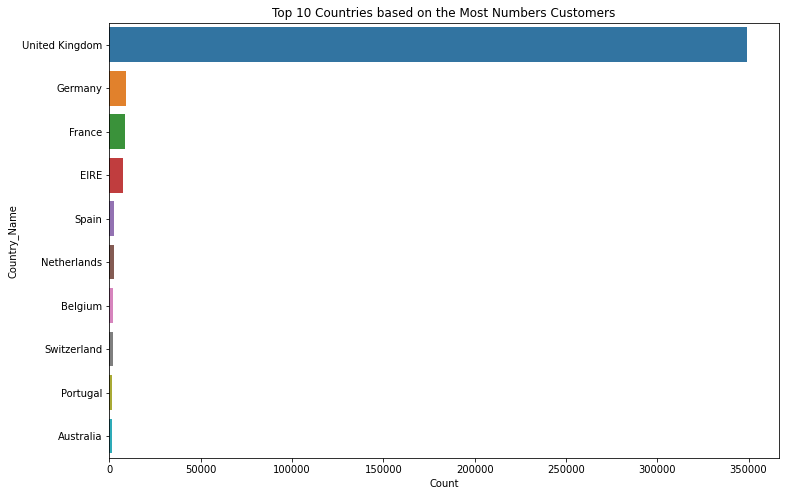

In [103]:
# top 10 countries
plt.figure(figsize=(12,8))
plt.title('Top 10 Countries based on the Most Numbers Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[:10])

We can observe that The United Kingdom leads other countries with huge margin. However, this could be due to the fact that the company is based out of the UK. Moreover, thus as expected most of the orders are coming from the nearby European countries.

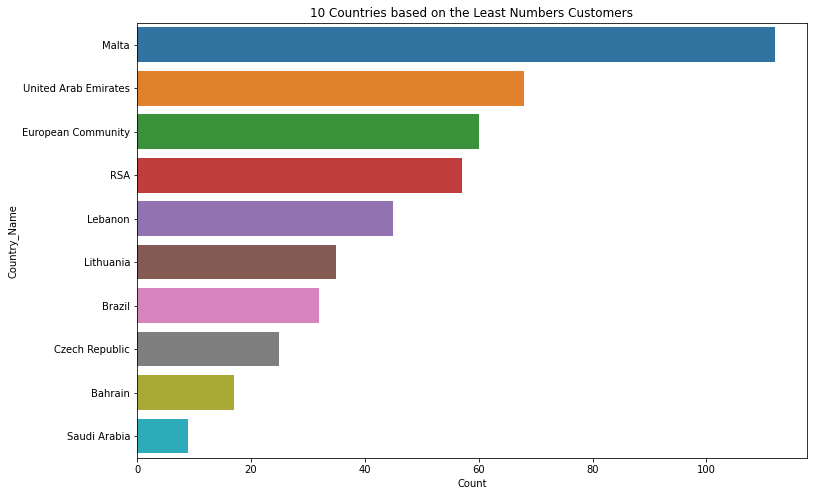

In [104]:
# bottom 10 countries
plt.figure(figsize=(12,8))
plt.title('10 Countries based on the Least Numbers Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[-10:])

Countries located in places other than Europe are in the bottom leg of the countries ordering from the platform.

Top products to order from website

In [105]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [106]:
# product buys
product_df=data['Description'].value_counts().reset_index()
product_df.rename(columns={'index': 'Product'}, inplace=True)
product_df.rename(columns={'Description': 'Count'}, inplace=True)
product_df.head() ## top 5 ordered items

,Product,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


In [107]:
least_items = len(product_df.loc[product_df["Count"] == 1]) ## least ordered items
print("There are",least_items,"items, out of",len(product_df), "items which are ordered least from the website")

There are 213 items, out of 3877 items which are ordered least from the website


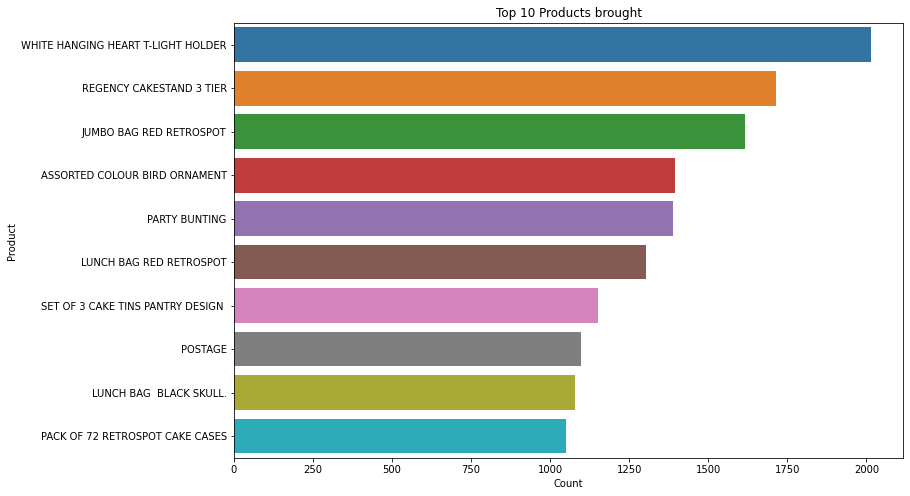

In [108]:
# top 10 products brought
plt.figure(figsize=(12,8))
plt.title('Top 10 Products brought')
sns.barplot(y='Product',x='Count',data=product_df[:10])

Most number of items sold is "WHITE HANGING HEART T-LIGHT HOLDER" closly followed by "REGENCY CAKESTAND 3 TIER" and "JUMBO BAG RED RETROSPOT".




In [109]:
# Stock code dataframe
StockCode_df=data['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'Stock_Code'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head() ## top 5 stock codes

,Stock_Code,Count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389


In [110]:
StockCode_df.tail() ## bottom 5 stock codes

,Stock_Code,Count
3660,90076,1
3661,90176A,1
3662,90074,1
3663,90128B,1
3664,90190A,1


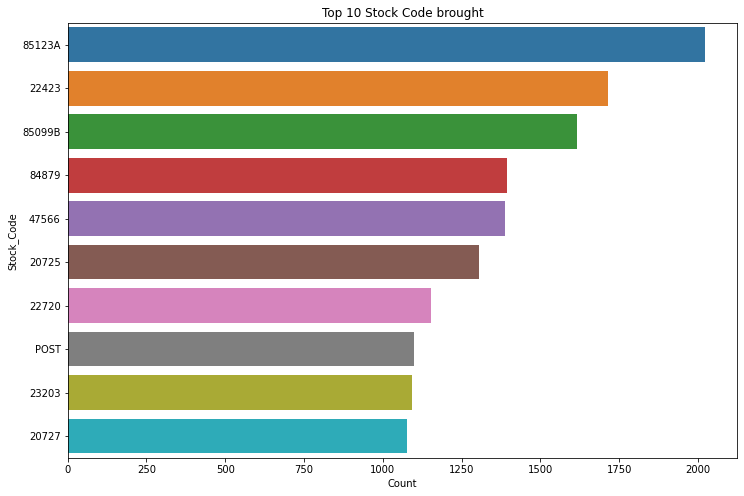

In [111]:
# top 10 Stock Code brought
plt.figure(figsize=(12,8))
plt.title('Top 10 Stock Code brought')
sns.barplot(y='Stock_Code',x='Count',data=StockCode_df[:10])

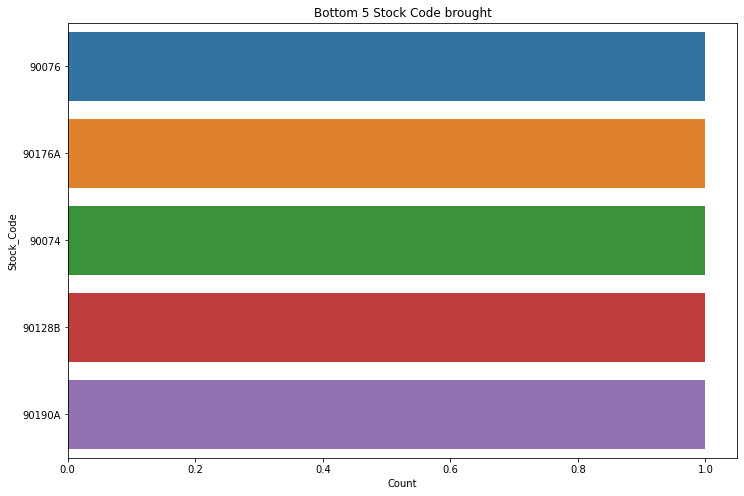

In [112]:
# bottom 5 Stock Code brought
plt.figure(figsize=(12,8))
plt.title('Bottom 5 Stock Code brought')
sns.barplot(y='Stock_Code',x='Count',data=StockCode_df[-5:])

Customers

In [113]:
# Customer percentage
x = data.Country.apply(lambda x: x if x == 'United Kingdom' else 'Not UK').value_counts().rename('#Customers')
y = (x/data.shape[0]).rename('%Customers')
customer_percent = pd.concat([x, y], axis= 1)
customer_percent

,#Customers,%Customers
United Kingdom,349203,0.889254
Not UK,43489,0.110746


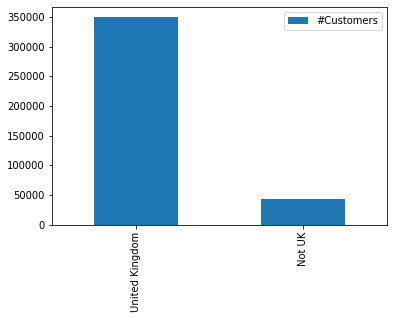

In [114]:
customer_percent.plot(y="#Customers", kind="bar")

# Feature Engineering
Now let's try to do some feature engineering

1. Extracting Time, Day and Date

In [115]:
# Correcting date time format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [116]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Now, we will try to extract day and dates from the column

In [117]:
# extracting dates and features
data['Day']=data['InvoiceDate'].dt.day_name() # Day Name
data["year"] = data["InvoiceDate"].apply(lambda x: x.year) # Year
data["month_num"] = data["InvoiceDate"].apply(lambda x: x.month) # Month Number
data["day_num"] = data["InvoiceDate"].apply(lambda x: x.day) # Day_No
data["hour"] = data["InvoiceDate"].apply(lambda x: x.hour) # Hour
data["minute"] = data["InvoiceDate"].apply(lambda x: x.minute) # Minute

In [118]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26


In [119]:
# creating new feature Total Amount
data["Total_Amt"] = data["Quantity"]*data["UnitPrice"]

In [120]:
# creating new column Month
month_dict = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
data["Month"] = data.month_num.apply(lambda x: month_dict[x])


In [121]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,Total_Amt,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,22.00,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,Dec


In [122]:
# Sales across days
day_df = data["Day"].value_counts().reset_index()
day_df.rename({"index":"Day","Day":"Count"}, inplace=True,axis=1)
day_df.sort_values(by="Count",inplace=True,ascending=False)
day_df

,Day,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


In [123]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

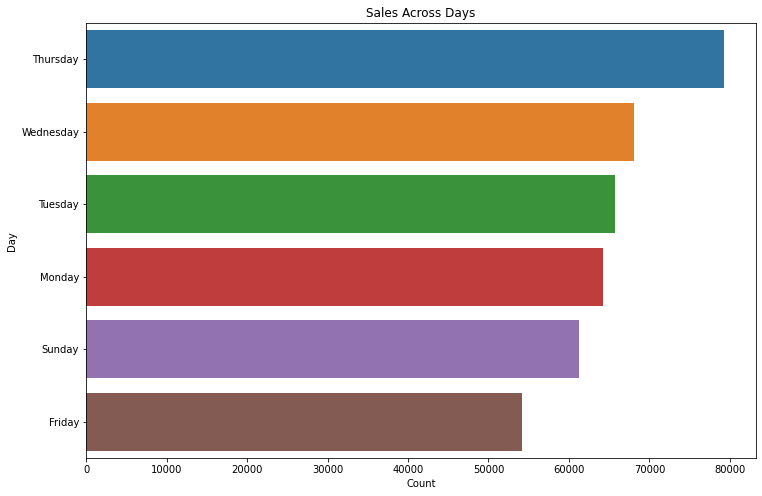

In [124]:
plt.figure(figsize=(12,8))
sns.barplot(data=day_df,x="Count",y="Day")
plt.title("Sales Across Days")
plt.show()

Here, we can most sales are observed on Thusrsdays, followed by Wednesday and Tuesdays. Surprisingly, there is less sales on weekends. Maybe, company needs to do promotional activities on the weekends to imprve sales.<br>
One interesting fact observed that there is no sales on Saturdays. We were unable to find any information regarding the same and assumed there is no operations on Saturdays.

In [125]:
# Sales across months
df_month = data["Month"].value_counts().reset_index()
df_month.rename({"index":"Month","Month":"Count"}, inplace=True,axis=1)
df_month.sort_values(by="Count",inplace=True,ascending=False)
df_month

,Month,Count
0,Nov,63168
1,Oct,48793
2,Dec,42696
3,Sep,39669
4,May,28073
5,Jun,26926
6,Mar,26870
7,Aug,26790
8,Jul,26580
9,Apr,22433


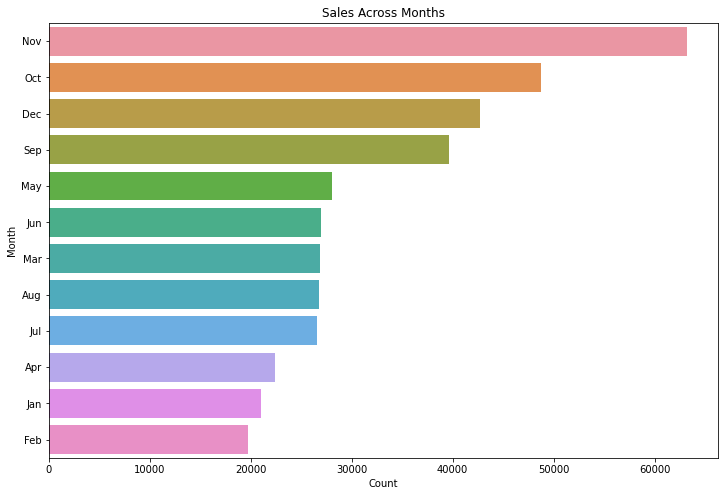

In [126]:
# plotting graph for month
plt.figure(figsize=(12,8))
sns.barplot(data=df_month,x="Count",y="Month")

plt.title("Sales Across Months")
plt.show()

As observed from the above graph that October, November and December are the months when most of the sales happen. and sales are on the lower side in the months of January and February.

In [127]:
# Sales across Hour
df_hour = data["hour"].value_counts().reset_index()
df_hour.rename({"index":"Hour","hour":"Count"}, inplace=True,axis=1)
df_hour.sort_values(by="Count",inplace=True,ascending=False)
df_hour

,Hour,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


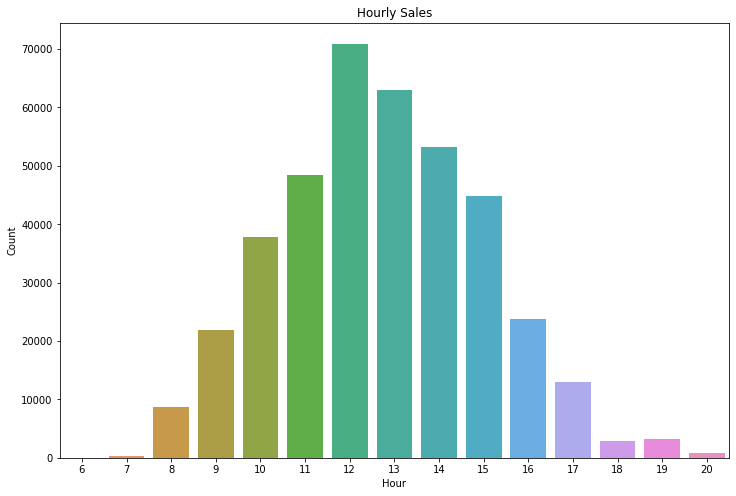

In [128]:
# plotting graph for Hourly sales
plt.figure(figsize=(12,8))
sns.barplot(data=df_hour,x="Hour",y="Count")

plt.title("Hourly Sales")
plt.show()

It can be observed that most amount of Sales happen during the afternoon, from 10:00 hours to 16:00  hours. Company needs to boost it's sales during the evening time and early mornings. Company can indulge in off-hours promotional activities for the same.

Let's look at customers, who is buying in most quantities

In [129]:
# Top 5 customers buying in highest quantities
data.groupby("CustomerID")["Quantity"].sum().reset_index().sort_values(by="Quantity",ascending=False)[:5]

,CustomerID,Quantity
1689,14646.0,196915
3008,16446.0,80997
1879,14911.0,80240
55,12415.0,77374
0,12346.0,74215


In [130]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,Total_Amt,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,22.00,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,Dec


In [131]:
len(data['Description'].unique())

3877

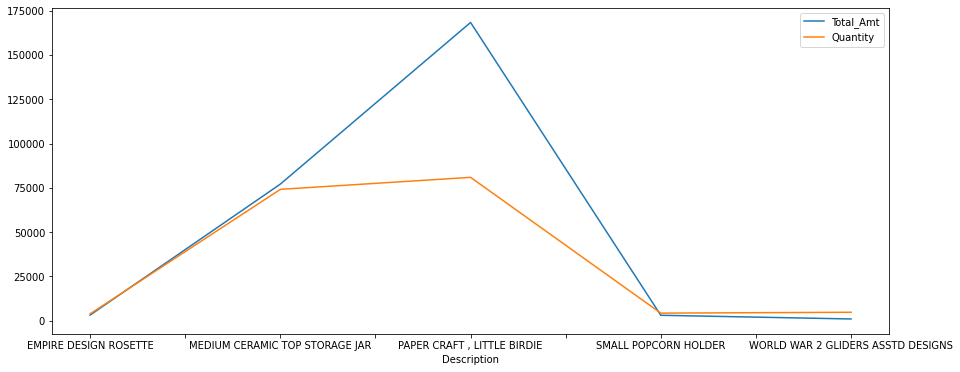

In [132]:
# Comparision 
#plt.plot(figsize = (20,6))
product_df = data[['Description','Total_Amt','Quantity']].sort_values('Quantity',ascending=False)[:5]
product_df.groupby("Description").sum().plot(kind="line",figsize=(15,6))


## RFM Analysis
Now, we will try to do RFM Analysis for segmenting customers. <BR>
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on.

At first, we will try building an RFM model by assigning Recency, Frequency and Monetary values to each customers in our dataset.<BR>
For this I will at first make seperate dataframes for R,F and M and will merge them into a new seperate rfm_df.

Let's try to find out the latest date for calculation purposes and for this we require the latest invoice date in our dataset.

### Recency

In [133]:
# latest date
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

So here, we observed that the latest invoice date in 9th Dec 2011. Hence, taking the next day as the latest day.

In [134]:
# Recency dataframe
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)


In [138]:
df_recency = data
df_recency = df_recency.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID','max_date']

# The difference between the reference date and maximum date in the dataframe for each customer(which is the recent visit) is Recency 
df_recency['Recency'] = df_recency['max_date'].apply(lambda row: (Latest_Date - row).days)
df_recency.drop('max_date',inplace=True,axis=1)
df_recency[['CustomerID','Recency']].head()


,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


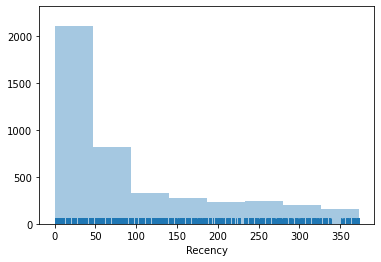

In [141]:
# Recency  Distribution plot
sns.distplot(df_recency.Recency,bins=8,kde=False,rug=True)

Here, one good thing is that customers who order within last 2 months are more and few customers who haven't order since long need to be targeted seperately

### Frequency

In [144]:
# We can get the Frequency of the customer by summing up the number of orders
df_frequency = data
df_frequency = df_frequency.groupby(by='CustomerID',as_index=False)['InvoiceNo'].nunique()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


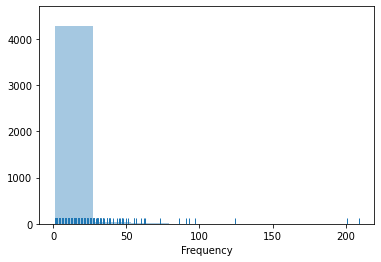

In [168]:
# Frequency Plot
sns.distplot(df_frequency['Frequency'],bins=8,kde=False,rug=True)

In [169]:
df_frequency.Frequency.describe()

count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Frequency, dtype: float64

We can observe that a lot of customers have order just once. We need to look into this factor and investigate such behaviour of the customer and motivation behind it.

### Monetary

In [153]:
# Monetary can be calculated as the sum of the Amount of all orders by each customer

df_monetary = data
df_monetary = df_monetary.groupby(by='CustomerID',as_index=False)['Total_Amt'].sum()

df_monetary.columns = ['CustomerID','Monetary']
df_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


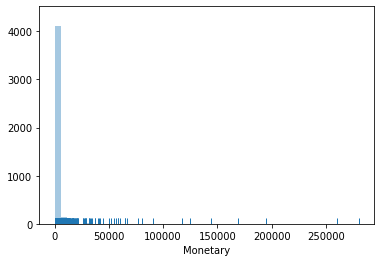

In [156]:
# Distribution of monetary values
sns.distplot(df_monetary.Monetary,kde=False,rug=True)

In [158]:
df_monetary.Monetary.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

In [163]:
df_monetary.Monetary.quantile(0.95)

5789.999499999982

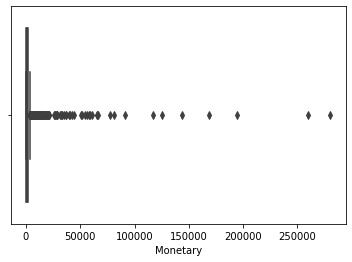

In [166]:
sns.boxplot(df_monetary['Monetary'])

Our customers are spending around 668 bucks. <BR>
One important observation is that amount spent by top 5% customers is significantly high. Maybe these customers are the whole-sellers. 

Let’s merge the Recency, Frequency, and Monetary values and create a new dataframe

In [172]:
# merging 
rfm_df = df_recency.merge(df_frequency,on='CustomerID')
rfm_df = rfm_df.merge(df_monetary,on='CustomerID')

In [174]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
